In [63]:
from astropy.io import fits
early_type_galaxy = fits.open('/Users/xufengwei/Downloads/spDR2-023_early_type_galaxy.fit')
late_type_galaxy = fits.open('/Users/xufengwei/Downloads/spDR2-027_late_type_galaxy.fit')
quasar = fits.open('/Users/xufengwei/Downloads/spDR2-029_quasar.fit')

In [125]:
early_type_galaxy.info()
early_type_galaxy[1].data.names

Filename: /Users/xufengwei/Downloads/spDR2-023_early_type_galaxy.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   (4197, 4)   float32   
  1                1 BinTableHDU     54   0R x 23C   ['1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1J', '1E', '1E', '1E', '1E', '1A']   
  2                1 BinTableHDU     54   0R x 23C   ['1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1J', '1E', '1E', '1E', '1E', '1A']   
  3                1 BinTableHDU     18   0R x 5C   [1E, 1E, 1E, 1J, 1E]   
  4                1 BinTableHDU     32   0R x 12C   [1J, 1J, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   
  5                1 BinTableHDU     26   0R x 9C   [19A, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   
  6                1 BinTableHDU     14   0R x 3C   [1J, 1J, 1E]   


['wave',
 'waveErr',
 'waveMin',
 'waveMax',
 'sigma',
 'sigmaErr',
 'sigmaMin',
 'sigmaMax',
 'height',
 'heightErr',
 'continuum',
 'ew',
 'ewErr',
 'ewMin',
 'specIndex',
 'nsigma',
 'chisq',
 'nu',
 'restWave',
 'weight',
 'z',
 'zErr',
 'lineMask']

In [171]:
import matplotlib.pyplot as plt
import numpy as np

# 给出 early_type_galaxy 的波长数组
firstlamb1 = early_type_galaxy[0].header[10]
interval1 = early_type_galaxy[0].header[11]
number1 = early_type_galaxy[0].header[3]
lamb1 = [0 for i in range(number1)]
lamb1[0] = firstlamb1
for i in range(0,number1):
    lamb1[i] = 10**(firstlamb1 + i * interval1)   
lamb1 = np.array(lamb1)
for i in range(0,len(lamb1)):
    if lamb1[i] > 7000:
        print('To cut')
        cutpoint = i
        break
lamb1.resize(cutpoint)
cutpoint1 = cutpoint

# 给出 late_type_galaxy 的波长数组
firstlamb2 = late_type_galaxy[0].header[10]
interval2 = late_type_galaxy[0].header[11]
number2 = late_type_galaxy[0].header[3]
lamb2 = [0 for i in range(number2)]
lamb2[0] = firstlamb2
for i in range(0,number2):
    lamb2[i] = 10**(firstlamb2 + i * interval2)   
lamb2 = np.array(lamb2)
for i in range(0,len(lamb2)):
    if lamb2[i] > 7000:
        print('To cut')
        cutpoint = i
        break
lamb2.resize(cutpoint)
cutpoint2 = cutpoint

# 给出 quasar 的波长数组
firstlamb3 = quasar[0].header[12]
interval3 = quasar[0].header[13]
number3 = quasar[0].header[3]
lamb3 = [0 for i in range(number3)]
lamb3[0] = firstlamb3
for i in range(0,number3):
    lamb3[i] = 10**(firstlamb3 + i * interval3)   
lamb3 = np.array(lamb3)
for i in range(0,len(lamb3)):
    if lamb3[i] > 7000:
        print('To cut')
        cutpoint = i
        break
lamb3.resize(cutpoint)
cutpoint3 = cutpoint
lamb3new = []
for i in range(0,len(lamb3)):
    if lamb3[i] >= 3500:
        lamb3new.append(lamb3[i])
        if startpoint == i-1:
            print(startpoint+1)
    else:
        startpoint = i
lamb3 = np.array(lamb3new)
startpoint += 1

To cut
To cut
To cut
6990


3011

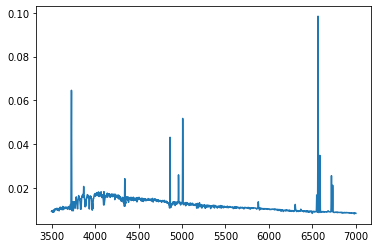

In [77]:
plt.plot(lamb, late_type_galaxy[0].data[0][0:cutpoint])

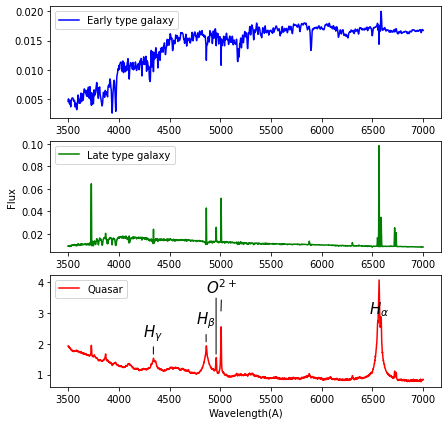

In [239]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 7))
axes[0].plot(lamb1, early_type_galaxy[0].data[0][0:cutpoint1], color = 'b', label = 'Early type galaxy')
axes[0].legend()
axes[1].plot(lamb2, late_type_galaxy[0].data[0][0:cutpoint2], color = 'green', label = 'Late type galaxy')
axes[1].legend()
axes[1].set_ylabel('Flux')
axes[2].plot(lamb3, quasar[0].data[0][startpoint:cutpoint3], color = 'r', label = 'Quasar')
axes[2].legend()
axes[2].set_xlabel('Wavelength(A)')
plt.annotate(r'$H_\alpha$',xy=(6563,3),textcoords='offset points',xytext=(-10,0),fontsize=15)
plt.annotate(r'$H_\beta$',xy=(4861,2),textcoords='offset points',xytext=(-10,20),fontsize=15,arrowprops=dict(arrowstyle='-'))
plt.annotate(r'$H_\gamma$',xy=(4341,1.6),textcoords='offset points',xytext=(-10,20),fontsize=15,arrowprops=dict(arrowstyle='-'))
plt.annotate(r'$O^{2+}$',xy=(5007,3),textcoords='offset points',xytext=(-15,20),fontsize=15,arrowprops=dict(arrowstyle='-'))
plt.annotate(r'',xy=(4959,1.6),textcoords='offset points',xytext=(0,60),fontsize=15,arrowprops=dict(arrowstyle='-'))
plt.savefig('./Comparison.pdf')
plt.savefig('./Comparison.png')